In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [7]:
#Load dataset
zoo = pd.read_csv('../aula_14/Exercicio/zoo_2.csv')
zoo.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
1,True,False,False,True,False,False,False,True,True,True,False,False,4,True,False,True,mammal
2,False,False,True,False,False,True,True,True,True,False,False,True,0,True,False,False,fish
3,True,False,False,True,False,False,True,True,True,True,False,False,4,False,False,True,mammal
4,True,False,False,True,False,False,True,True,True,True,False,False,4,True,False,True,mammal


In [16]:
# Trainig dataset
X = zoo.values[:, :16]
# Target
y = zoo.values[:,-1:]
print(X.shape)

(101, 16)


In [17]:
print(y.shape)

(101, 1)


In [9]:
feature_cols=('hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize')
unique_elements, counts_elements = np.unique(y, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[['amphibian' 'bird' 'fish' 'insect' 'invertebrate' 'mammal' 'reptile']
 [4 20 13 8 10 41 5]]


### Decision Tree
> class sklearn.tree.DecisionTreeClassifier(**criterion**='gini', **splitter**='best', **max_depth**=None, **min_samples_split**=2, **min_samples_leaf**=1, **min_weight_fraction_leaf**=0.0, **max_features**=None, **random_state**=None, **max_leaf_nodes**=None, **min_impurity_decrease**=0.0, **min_impurity_split**=None, **class_weight**=None, **presort**='deprecated', **ccp_alpha**=0.0)

In [10]:
#CART ALGORITHM
#max_depth: poda da árvore. O nodo raiz não conta pois possui todos os dados e não é uma ramificação. If None, 
#then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
#min_samples_leaf: quantidade mínima de sample nos nodos finais (folhas)

tree = DecisionTreeClassifier(criterion = 'gini', random_state=100,max_depth=3,min_samples_leaf=5)
tree.fit(X,y)
#Cross Validation
predictions = cross_val_predict(tree,X,y,cv=10)

C:\Users\Jhonathan Miguel\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


In [11]:
#Compute accuracy
accuracy_score(y,predictions)*100
#print("The prediction accuracy is: ",tree.score(X,y)*100,"%")

83.16831683168317

<Axes: >

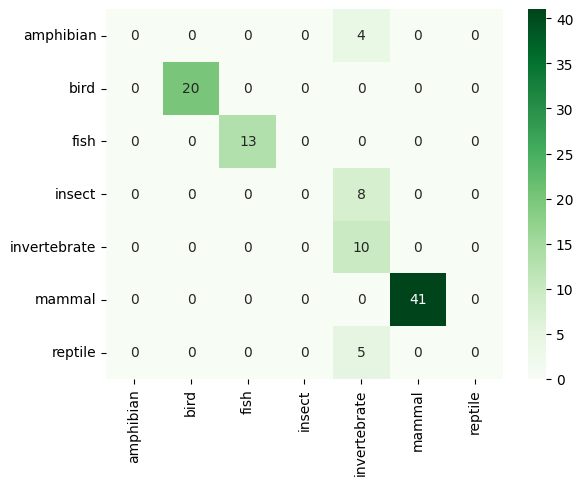

In [12]:
cf = confusion_matrix(y,predictions)
lbl1=['amphibian', 'bird', 'fish', 'insect', 'invertebrate', 'mammal', 'reptile']
lbl2 = ['amphibian', 'bird', 'fish', 'insect', 'invertebrate', 'mammal', 'reptile']
sns.heatmap(cf,annot=True,cmap="Greens", fmt="d",xticklabels=lbl1,yticklabels=lbl2)

## 4 - Avaliação
![Acurácia](https://cdn.discordapp.com/attachments/666438977364164630/671551093032878110/acuracia.png)
![Precisão](https://cdn.discordapp.com/attachments/666438977364164630/671551101627006991/precisao.png)
![Recall](https://cdn.discordapp.com/attachments/666438977364164630/671551103946457089/recall.png)
![F1](https://cdn.discordapp.com/attachments/666438977364164630/671551099567734804/f1.png)

In [13]:
from sklearn.metrics import classification_report
#Gera a matriz de confusão do test
print(classification_report(y,predictions))

              precision    recall  f1-score   support

   amphibian       0.00      0.00      0.00         4
        bird       1.00      1.00      1.00        20
        fish       1.00      1.00      1.00        13
      insect       0.00      0.00      0.00         8
invertebrate       0.37      1.00      0.54        10
      mammal       1.00      1.00      1.00        41
     reptile       0.00      0.00      0.00         5

    accuracy                           0.83       101
   macro avg       0.48      0.57      0.51       101
weighted avg       0.77      0.83      0.79       101



C:\Users\Jhonathan Miguel\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jhonathan Miguel\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jhonathan Miguel\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
#Generate the tree in a text format
from sklearn.tree import export_text
r = export_text(tree, feature_names=feature_cols)
print(r)

|--- milk <= 0.50
|   |--- feathers <= 0.50
|   |   |--- fins <= 0.50
|   |   |   |--- class: invertebrate
|   |   |--- fins >  0.50
|   |   |   |--- class: fish
|   |--- feathers >  0.50
|   |   |--- class: bird
|--- milk >  0.50
|   |--- class: mammal



In [19]:
from sklearn import tree
tree.plot_tree(tree) 

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got <module 'sklearn.tree' from 'C:\\Users\\Jhonathan Miguel\\miniconda3\\Lib\\site-packages\\sklearn\\tree\\__init__.py'> instead.

In [ ]:
#Visualization
#pip install graphviz -- for windows: conda install -c anaconda graphviz -- restart machine
#pip install pydotplus

In [ ]:
from sklearn.externals.six import StringIO
from IPython.display import Image
#converts decision tree classifier into dot file and 
from sklearn.tree import export_graphviz
#convert this dot file to png or displayable form on Jupyter.
import pydotplus

In [18]:
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data, rounded=True,filled=True, 
                special_characters=True, feature_names=feature_cols,
                class_names=['amphibian','bird','fish','insect','invertebrate','mammal','reptile'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('decisiontree.png')
Image(graph.create_png())

NameError: name 'StringIO' is not defined